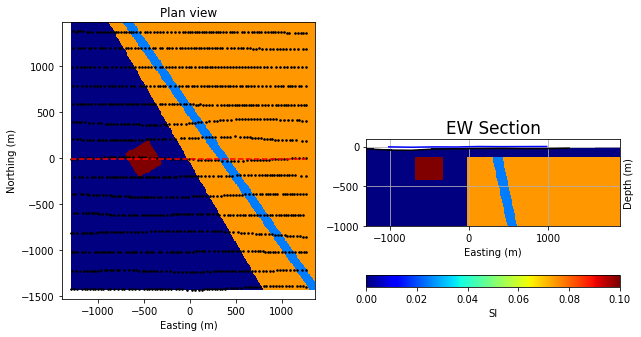

<Figure size 432x648 with 0 Axes>

In [4]:
## Load all libraries and setup the synthetic problem
from library.Mag import Mag, ProblemSetter, MathUtils, Simulator, DataIO
import numpy as np
from SimPEG import PF, Utils, Mesh, Maps

import matplotlib.pyplot as plt
import ipywidgets as widgets

# Load data and topo and build default model
survey = Mag.readMagneticsObservations('./DIGHEM_Mag_floor10nt_25m.obs')
topo = np.genfromtxt('TKCtopoDwnS.dat', skip_header=1)
locs = survey.srcField.rxList[0].locs

# Build the problem
survey = ProblemSetter.setSyntheticProblem(locs, topo=topo, discretize=True, plotSections=True)


# 2.1.1.	Magnetic Data Response, Gridding, and Visualization#


## Magnetic response of a simple geologic model


<img src="./images/SyntheticModel.png">

The magnetic response (total field anomaly) of the geologic model is calculated on a series of east-west flight lines running roughly perpendicular to the general strike of geologic boundaries and structures featured in the model. Flight line spacing is 200 m. Data was collected at a flight height of 40 m. Topography is assumed to be flat in this example. The magnetic data are in nanoteslas (NT). 

An East-West profile through the magnetic data is shown. The profile location can be changed using the slider bars, and the number of sampling points can be varied.  



In [2]:
param = Simulator.ViewMagSurveyWidget(survey)
display(param)

interactive(children=(FloatSlider(value=-14.629972527676728, continuous_update=False, description='East', max=…

## Gridding the magnetic data

Magnetic data should be gridded prior to applying transforms and filters. This means that the flight line data must be interpolated on a regular 2D grid. There are numerous possible ways to grid data. Several researchers have demonstrated that minimum curvature methods are robust and yield a sensible and smooth result, so we have chosen minimum curvature to complete the gridding for this example. In this example, the data are interpolated on a 10 m x 10 m grid. The magnetic field parameters of central BC (Geoscience BC Search II area) are returned to here. 

The resulting gridded data shows the larger and smaller magnetic bodies, and the magnetic low related to the NW trending structure cross-cutting the larger magnetic domain.


In [7]:
x, y = locs[:, 0], locs[:, 1]
gridCC, d_grid = MathUtils.minCurvatureInterp(
                np.c_[x, y], survey.dobs,
                gridSize=10
                )

gridObject = DataIO.dataGrid()
gridObject.dx, gridObject.dy = 10, 10
gridObject.nx, gridObject.ny = d_grid.shape[1], d_grid.shape[0]
gridObject.values = d_grid
gridObject.limits = np.r_[gridCC[:,0].min(), gridCC[:,0].max(),
                          gridCC[:,1].min(), gridCC[:,1].max()]

In [8]:
view = Simulator.dataHillsideWidget(gridObject)
display(view)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='SunAzimuth', max=360.0, ste…